In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


1. Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
print('Data shape : ', df.shape)

Data shape :  (973, 15)


In [5]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [6]:
df.rename(columns=lambda x: x.replace('(', '').replace(')', ''), inplace=True)
df.columns = df.columns.str.strip().str.replace(' ', '_')

df

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days/week,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [7]:
df.Workout_Type.value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [8]:
df.Experience_Level.value_counts()

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Workout_Type', ylabel='Count'>

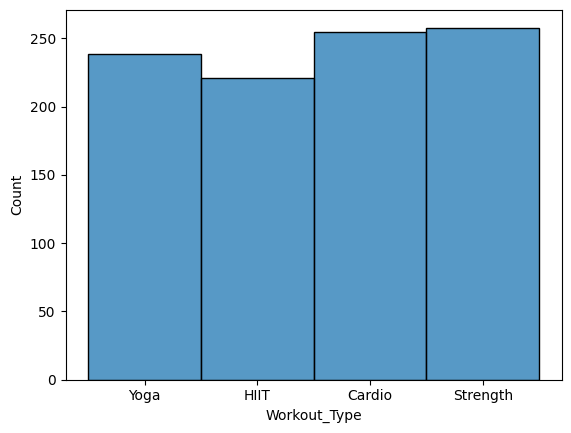

In [9]:
sns.histplot(df['Workout_Type'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Experience_Level', ylabel='Count'>

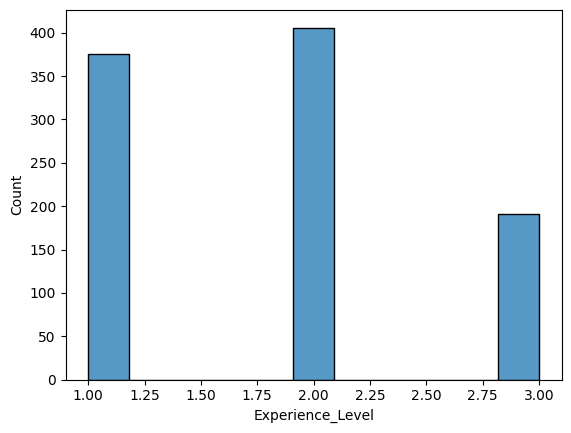

In [10]:
sns.histplot(df['Experience_Level'])

2. Cleaning Data / Preprocessing Data 

In [11]:
df.isnull().sum()

Age                            0
Gender                         0
Weight_kg                      0
Height_m                       0
Max_BPM                        0
Avg_BPM                        0
Resting_BPM                    0
Session_Duration_hours         0
Calories_Burned                0
Workout_Type                   0
Fat_Percentage                 0
Water_Intake_liters            0
Workout_Frequency_days/week    0
Experience_Level               0
BMI                            0
dtype: int64

In [12]:
df.duplicated().sum()

0

3. Exploratory Data Analition

<function matplotlib.pyplot.show(close=None, block=None)>

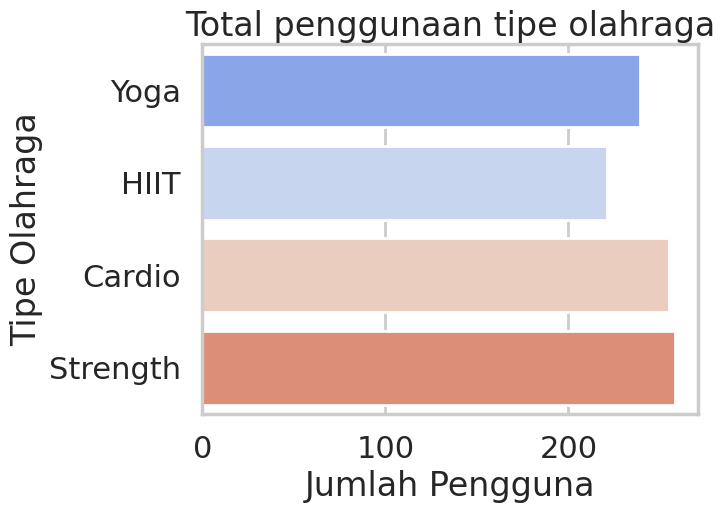

In [13]:
sns.set_theme(style='whitegrid', context='poster', palette='pastel')
sns.countplot(data=df, y='Workout_Type',palette= 'coolwarm')
plt.ylabel('Tipe Olahraga')
plt.xlabel('Jumlah Pengguna')
plt.title('Total penggunaan tipe olahraga')
plt.show

Text(0.5, 1.0, 'Total level olahraga pengguna')

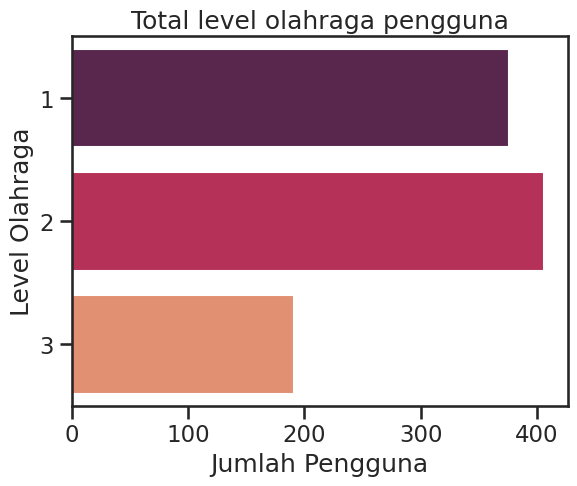

In [14]:
sns.set_theme(style='ticks', context='talk', palette='muted')
sns.countplot(data=df, y='Experience_Level',palette= 'rocket')
plt.ylabel('Level Olahraga')
plt.xlabel('Jumlah Pengguna')
plt.title('Total level olahraga pengguna')


Text(0.5, 1.0, 'Tingkatan level olahraga sesuai tipe olahraga')

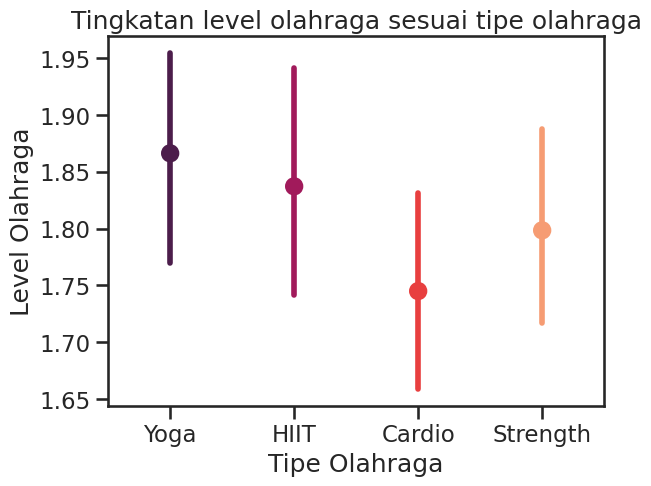

In [15]:
sns.set_theme(style='ticks', context='talk', palette='muted')
sns.pointplot(data=df, x='Workout_Type',  y='Experience_Level',palette= 'rocket')
plt.ylabel('Level Olahraga')
plt.xlabel('Tipe Olahraga')
plt.title('Tingkatan level olahraga sesuai tipe olahraga')

4. Data Preparation

In [16]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days/week,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          973 non-null    int64  
 1   Gender                       973 non-null    object 
 2   Weight_kg                    973 non-null    float64
 3   Height_m                     973 non-null    float64
 4   Max_BPM                      973 non-null    int64  
 5   Avg_BPM                      973 non-null    int64  
 6   Resting_BPM                  973 non-null    int64  
 7   Session_Duration_hours       973 non-null    float64
 8   Calories_Burned              973 non-null    float64
 9   Workout_Type                 973 non-null    object 
 10  Fat_Percentage               973 non-null    float64
 11  Water_Intake_liters          973 non-null    float64
 12  Workout_Frequency_days/week  973 non-null    int64  
 13  Experience_Level    

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Workout_Type'] = label_encoder.fit_transform(df['Workout_Type'])

In [19]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days/week,Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [20]:
x = df.drop(columns = ['Experience_Level'])
y = df['Experience_Level']

print('Data x: ', x.shape)
print('Data y: ', y.shape)

Data x:  (973, 14)
Data y:  (973,)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [22]:
print('Data tranining x: ', x_train.shape)
print('Data tranining y: ', y_train.shape)
print('Data test x: ', x_test.shape)
print('Data test y: ', y_test.shape)

Data tranining x:  (778, 14)
Data tranining y:  (778,)
Data test x:  (195, 14)
Data test y:  (195,)


5. Modelling

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_pred, y_test))
print('Akurasi Model KNN: {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           1       0.58      0.65      0.61        69
           2       0.69      0.62      0.65        84
           3       0.93      0.93      0.93        42

    accuracy                           0.70       195
   macro avg       0.73      0.73      0.73       195
weighted avg       0.70      0.70      0.70       195

Akurasi Model KNN: 69.74%


In [24]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days/week,Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [25]:
testing = {
    'Age' : [56], 
    'Gender' : [1], 
    'Weight_kg' : [88.3],
    'Height_m' : [1.71],
    'Max_BPM' : [180],
    'Avg_BPM' : [157],
    'Resting_BPM' : [60],
    'Session_Duration_hours' : [1.69],
    'Calories_Burned' : [1313.0],
    'Workout_Type' : [3],
    'Fat_Percentage' : [12.6],
    'Water_Intake_liters' : [3.5],
    'Workout_Frequency_days/week' : [4],
    'BMI' : [30.20]
}

testing = pd.DataFrame(testing)
testing

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days/week,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,30.2


In [26]:
pred_coba = knn.predict(testing)

print('Level Experience Olahraga Saya adalah ')
print(pred_coba)

Level Experience Olahraga Saya adalah 
[3]
